In [1]:
import matplotlib.pyplot as plt

import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import lsst.daf.persistence as dafPersist

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

afwDisplay.setDefaultBackend("matplotlib")

In [2]:
dataPath = "/project/rhl/Data/auxTel"
butler = dafPersist.Butler(dataPath)

In [3]:
butler.getKeys('raw')

{'dayObs': str, 'visit': int, 'detector': int}

In [4]:
image = butler.queryMetadata('raw', ['dayObs', 'visit', 'seqnum'])[-1]

In [5]:
camera = butler.get("camera")

In [6]:
dataId = dict(dayObs=image[0], visit=image[1], seqnum=image[2])

In [7]:
raw = butler.get('raw', dataId)

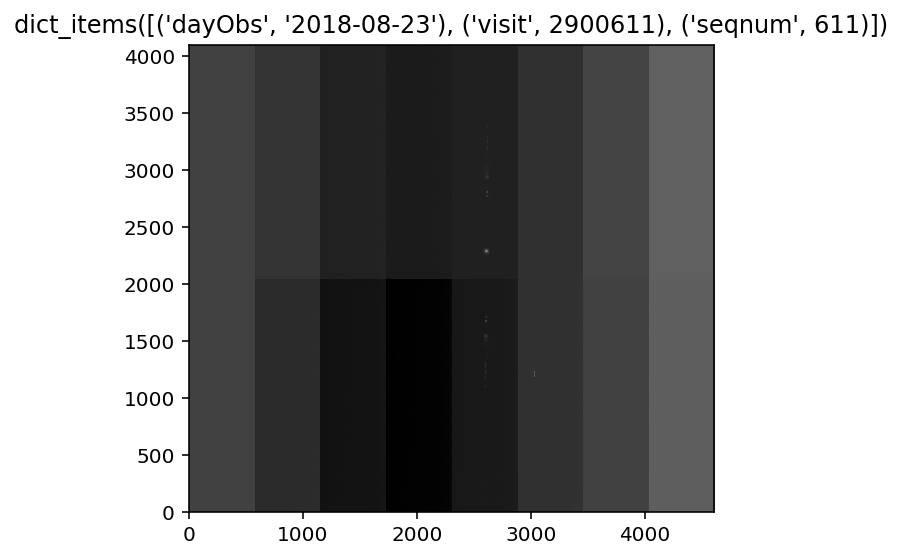

In [78]:
disp = afwDisplay.Display(1)    # you only need this in every cell because I'm using %matplotlib notebook. DM Bug??
disp.scale('asinh', 'zscale')
disp.mtv(raw, title=dataId.items())
#cameraGeomUtils.overlayCcdBoxes(raw.getDetector(), display=disp)

In [76]:
amp = raw.getDetector()[1]
print(amp.getName())

C11


In [49]:
data = raw[amp.getRawDataBBox()].image.array

In [50]:
import numpy as np

In [52]:
per_col_median = np.median(data, axis=0)

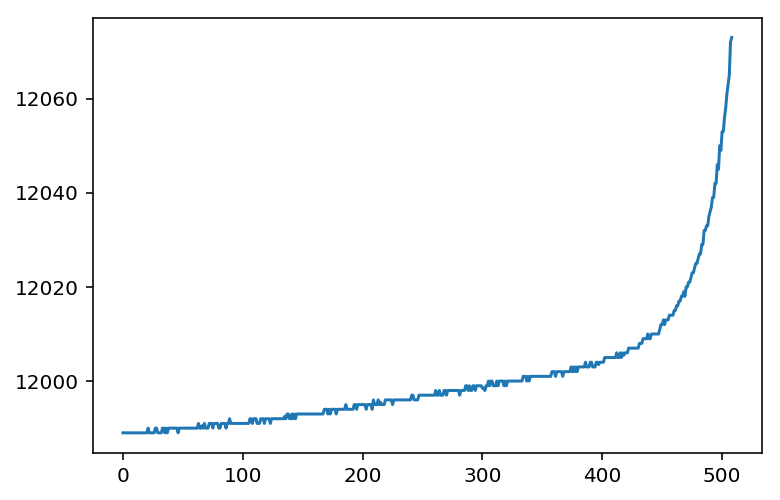

In [54]:
plt.plot(np.arange(per_col_median.shape[0]), per_col_median)

In [28]:
raw.getInfo().getMetadata().toDict()

{'CCD_MANU': 'ITL',
 'SEQFILE': 'ats_20180511.seq',
 'CCD_TYPE': '3800C',
 'MJD-OBS': 58354.01082659699,
 'MJD': 58354.011221423745,
 'SHUT_DEL': 0.0,
 'DATE': '2018-08-24T00:16:09.531',
 'SIMPLE': True,
 'NAXIS': 0,
 'BITPIX': 8,
 'BINX': 1,
 'FILENAME': 'ats_exp_7_20180824001535.fits',
 'BINY': 1,
 'CHECKSUM': '8eHA9eF98eFA8eF9',
 'DATASUM': '0',
 'HEADVER': 1,
 'DETSIZE': '[1:4072,1:4000]',
 'SEQNUM': 611,
 'EXTEND': True}

In [34]:
raw.getInfo().getVisitInfo().getExposureTime()

7.0

In [74]:
bias = butler.queryMetadata('raw', ['dayObs', 'visit', 'seqnum'], imageType='BIAS')[-2]
#print(bias)
biasId = dict(visit=bias[1], seqnum=bias[2], dayObs=bias[0])
biasData = butler.get('raw', biasId, imageType='BIAS')

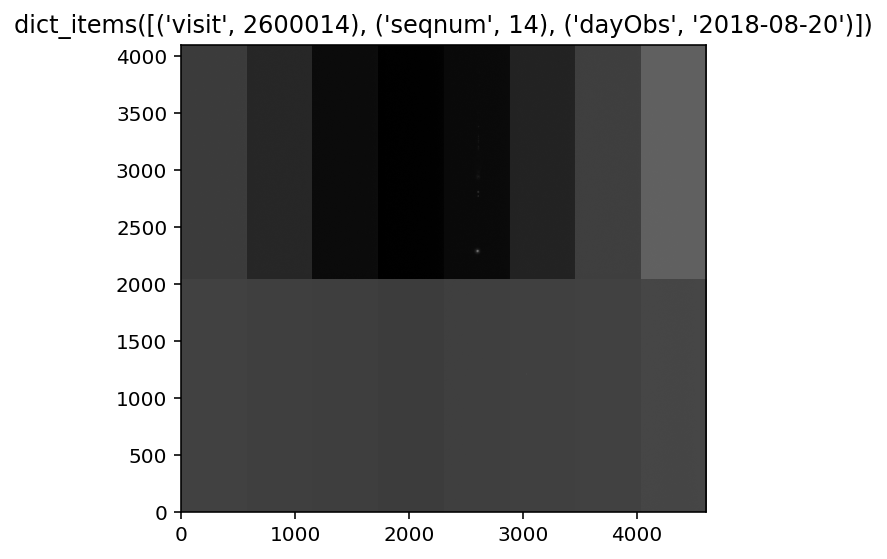

In [75]:
disp = afwDisplay.Display(1)    # you only need this in every cell because I'm using %matplotlib notebook. DM Bug??
disp.scale('asinh', 'zscale')
disp.mtv(biasData, title=biasId.items())